<a href="https://colab.research.google.com/github/hsiuliwang/new/blob/main/%E6%9C%80%E5%B0%8F%E7%94%9F%E6%88%90%E6%A8%B9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
##1（Kruskal’s algorithm)求最小生成樹
##參考:https://www.geeksforgeeks.org/kruskals-minimum-spanning-tree-algorithm-greedy-algo-2/

In [ ]:
'''什麼是最小生成樹？ 
給定一個連接的和無向的圖，該圖的生成樹是一個子圖，它是一棵樹，並將所有頂點連接在一起。單個圖可以具有許多不同的生成樹。加權，連接和無向圖的最小生成樹（MST）或最小權重生成樹是權重小於或等於其他所有生成樹的權重的生成樹。生成樹的權重是賦予生成樹的每個邊緣的權重之和。
最小生成樹有幾個邊？ 
最小生成樹具有（V – 1）個邊，其中V是給定圖中的頂點數。 
最小生成樹有哪些應用？

使用Kruskal算法查找MST的步驟:
1.按重量的遞減順序對所有邊緣進行排序。 
2.選擇最小的邊緣。檢查它是否與形成的生成樹形成一個循環。如果未形成循環，則包括該邊。否則，將其丟棄。 
3.重複步驟2，直到生成樹中有（V-1）個邊。


##python 排序
####依照長度排序
###key=lambda 元素: 元素[字段索引]
####例如：想对元素第二个字段排序，则###key=lambda y: y[1] 备注：这里y可以是任意字母，等同key=lambda x: x[1]
'''

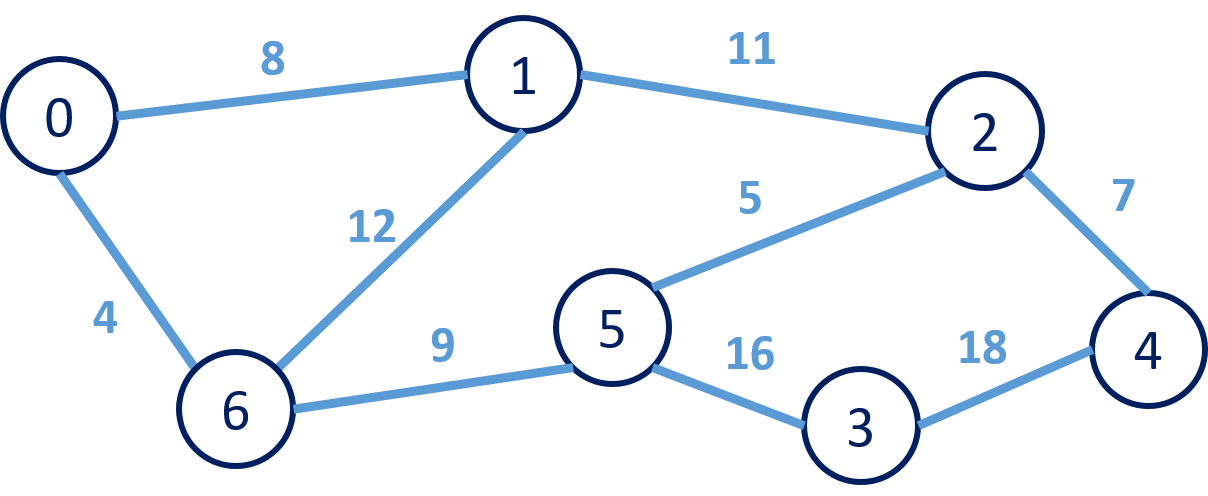

In [ ]:
# Python program for Kruskal's algorithm to find ##用Kruskal演算法
# Minimum Spanning Tree of a given connected,  ##給定連接的最小生成樹 找最小生成樹
# undirected and weighted graph ##無向圖

from collections import defaultdict

# Class to represent a graph


class Graph:

	def __init__(self, vertices):
		self.V = vertices # No. of vertices
		self.graph = [] # default dictionary
		# to store graph

	# function to add an edge to graph
	def addEdge(self, u, v, w):
		self.graph.append([u, v, w])  ##點u 點v u,v長度為w

	# A utility function to find set of an element i ##查找元素集i的實用函數
	# (uses path compression technique)
	def find(self, parent, i):
		if parent[i] == i:
			return i
		return self.find(parent, parent[i])

	# A function that does union of two sets of x and y ##一個將兩集合x和y進行聯集的函數
	# (uses union by rank)
	def union(self, parent, rank, x, y):
		xroot = self.find(parent, x)
		yroot = self.find(parent, y)

		# Attach smaller rank tree under root of
		# high rank tree (Union by Rank)
		if rank[xroot] < rank[yroot]:
			parent[xroot] = yroot
		elif rank[xroot] > rank[yroot]:
			parent[yroot] = xroot

		# If ranks are same, then make one as root
		# and increment its rank by one
		else:
			parent[yroot] = xroot
			rank[xroot] += 1

	# The main function to construct MST using Kruskal's
		# algorithm
	def KruskalMST(self):

		result = [] # This will store the resultant MST
		
		# An index variable, used for sorted edges
		i = 0
		
		# An index variable, used for result[]
		e = 0

		# Step 1: Sort all the edges in           ##1排好所有的邊
		# non-decreasing order of their
		# weight. If we are not allowed to change the
		# given graph, we can create a copy of graph
		self.graph = sorted(self.graph, 
							key=lambda item: item[2])    
		parent = []
		rank = []

		# Create V subsets with single elements
		for node in range(self.V):
			parent.append(node)
			rank.append(0)

		# Number of edges to be taken is equal to V-1
		while e < self.V - 1:

			# Step 2: Pick the smallest edge and increment ##2選擇最短的邊
			# the index for next iteration
			u, v, w = self.graph[i]
			i = i + 1
			x = self.find(parent, u)
			y = self.find(parent, v)

			# If including this edge does't         ##判斷是否有環
			# cause cycle, include it in result 
			# and increment the indexof result 
			# for next edge
			if x != y:
				e = e + 1
				result.append([u, v, w])
				self.union(parent, rank, x, y)
			# Else discard the edge

		minimumCost = 0
		print('Edges in the constructed MST') 
		for u, v, weight in result:
			minimumCost += weight
			print("%d -- %d == %d" % (u, v, weight))
		print("Minimum Spanning Tree" , minimumCost) ##印出最小生成樹

# Driver code

myg = Graph(7) ##共有7個點
##列出所有的邊(點1,點2,邊)
myg.addEdge(0, 1, 8)
myg.addEdge(0, 6, 4)
myg.addEdge(1, 2, 11)
myg.addEdge(1, 6, 12)
myg.addEdge(2, 4, 7)
myg.addEdge(2, 5, 5)
myg.addEdge(3, 4, 18)
myg.addEdge(3, 5, 16)
myg.addEdge(5, 6, 9)


# Function call

print("----my ruskalMST-----")
myg.KruskalMST()
# This code is contributed by Neelam Yadav


----my ruskalMST-----
Edges in the constructed MST
0 -- 6 == 4
2 -- 5 == 5
2 -- 4 == 7
0 -- 1 == 8
5 -- 6 == 9
3 -- 5 == 16
Minimum Spanning Tree 49


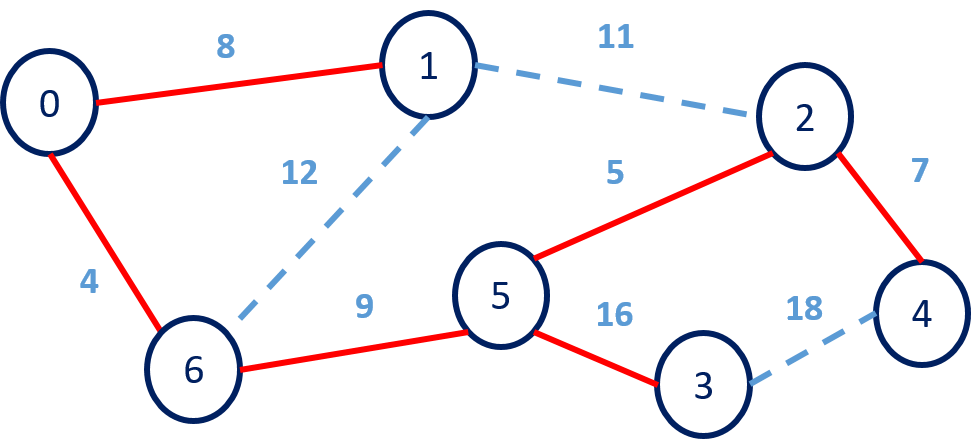

In [ ]:
###其他解(用abc字串) https://blog.csdn.net/weixin_42216109/article/details/98593821

In [ ]:
#2(Prim’s algorithm)求最小生成樹
##參考:https://blog.csdn.net/AivenZhong/article/details/84397752

In [ ]:
# 最小生成樹python實現
def prim(graph):
    n = len(graph)
    costs = [99999 for _ in range(n)]  # 父節點到該節點的邊權值
    costs[0] = 0
    parents = [-1 for _ in range(n)]
    visited = [False for _ in range(n)]
    t = []
    while len(t) < n:
        # 在costs找最短邊，把該最短邊的節點加入t，標記為已訪問
        minCost = 99999
        minNode = None
        for i in range(n):
            if not visited[i] and costs[i] < minCost:
                minCost = costs[i]
                minNode = i
        t.append(minNode)
        visited[minNode] = True

        # 遍遍歷節點的邊，更新最短邊
        for edge in graph[minNode]:
            if not visited[edge[0]] and edge[1] < costs[edge[0]]:
                costs[edge[0]] = edge[1]
                parents[edge[0]] = minNode
    return costs, parents


data = [
    [2, 0, 1],
    [2, 1, 5],
    [2, 3, 5],
    [2, 4, 5],
    [2, 5, 4],
    [0, 1, 6],
    [0, 3, 5],
    [4, 1, 3],
    [4, 5, 6],
    [5, 3, 2],
]
mydata = [
    [0, 1, 8],
    [0, 6, 4],
    [1, 2, 11],
    [1, 6, 12],
    [2, 4, 7],
    [2, 5, 5],
    [3, 4, 18],
    [3, 5, 16],
    [5, 6, 9],
]


# 構造鄰接表
n = 7
graph = [[] for _ in range(n)]
for edge in mydata:
    graph[edge[0]].append([edge[1], edge[2]])
    graph[edge[1]].append([edge[0], edge[2]])

# 最小生成樹MST
print('MST')
costs, parents = prim(graph)
print('costs:', costs)
print('parents', parents)
total = 0
for cost in costs:
    total += cost
print('Total cost of MST:', total)

MST
costs: [0, 8, 5, 16, 7, 9, 4]
parents [-1, 0, 5, 5, 2, 6, 0]
Total cost of MST: 49
